In [225]:
import requests
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [25]:
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36'}
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
req = requests.get(url,headers=header)
soup = BeautifulSoup(req.text)


In [65]:
v_table = soup.find("table", attrs = {"class":"type2"})
v_td = v_table.find_all("td")

In [41]:
v_table = soup.find("table", attrs = {"class":"type2"})
text = []
for td in v_table.find_all("td"):
    text.append(td.get_text())

In [ ]:
<img src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" width="7" height="6" style="margin-right:4px;" alt="하락">

In [184]:
v_table = soup.find('table', attrs = {'class':'type2'})
tmp = []
text = []
b=[]
for tr in v_table.find_all('tr', attrs = {'onmouseover':'mouseOver(this)'}):
    for td in tr.find_all('td'):
        # print(str(td).replace('\"',''))
        if '하락' in str(td):
            b.append('하락') 
        elif '상승' in str(td):
            b.append('상승')
        tmp.append(td.get_text().strip())
    text.append(tmp)
    tmp=[]

In [185]:
b

['하락', '상승', '하락', '하락', '하락', '하락', '하락', '상승', '상승', '상승']

In [186]:
df2 = pd.DataFrame(b)

In [171]:
df2

,0
0,false
1,true
2,false
3,false
4,false
5,false
6,false
7,true
8,true
9,true


In [188]:
text

[['2022.05.02', '67,300', '100', '66,600', '67,600', '66,500', '14,058,886'],
 ['2022.04.29', '67,400', '2,600', '65,100', '67,600', '65,000', '26,190,390'],
 ['2022.04.28', '64,800', '200', '65,400', '65,500', '64,500', '16,895,527'],
 ['2022.04.27', '65,000', '1,100', '65,400', '65,500', '64,900', '18,122,084'],
 ['2022.04.26', '66,100', '200', '66,400', '66,700', '66,100', '12,946,923'],
 ['2022.04.25', '66,300', '700', '66,500', '66,700', '66,300', '11,016,474'],
 ['2022.04.22', '67,000', '700', '67,200', '67,300', '66,700', '11,791,478'],
 ['2022.04.21', '67,700', '300', '67,600', '68,300', '67,500', '12,847,448'],
 ['2022.04.20', '67,400', '100', '67,000', '67,400', '66,500', '16,693,293'],
 ['2022.04.19', '67,300', '600', '67,100', '68,000', '67,000', '12,959,434']]

In [187]:
df1 = pd.DataFrame(text)
df1

,0,1,2,3,4,5,6
0,2022.05.02,"67,300",100,"66,600","67,600","66,500","14,058,886"
1,2022.04.29,"67,400","2,600","65,100","67,600","65,000","26,190,390"
2,2022.04.28,"64,800",200,"65,400","65,500","64,500","16,895,527"
3,2022.04.27,"65,000","1,100","65,400","65,500","64,900","18,122,084"
4,2022.04.26,"66,100",200,"66,400","66,700","66,100","12,946,923"
5,2022.04.25,"66,300",700,"66,500","66,700","66,300","11,016,474"
6,2022.04.22,"67,000",700,"67,200","67,300","66,700","11,791,478"
7,2022.04.21,"67,700",300,"67,600","68,300","67,500","12,847,448"
8,2022.04.20,"67,400",100,"67,000","67,400","66,500","16,693,293"
9,2022.04.19,"67,300",600,"67,100","68,000","67,000","12,959,434"


In [217]:
df = pd.concat([df1,df2], axis=1)
df

,0,1,2,3,4,5,6,0
0,2022.05.02,"67,300",100,"66,600","67,600","66,500","14,058,886",하락
1,2022.04.29,"67,400","2,600","65,100","67,600","65,000","26,190,390",상승
2,2022.04.28,"64,800",200,"65,400","65,500","64,500","16,895,527",하락
3,2022.04.27,"65,000","1,100","65,400","65,500","64,900","18,122,084",하락
4,2022.04.26,"66,100",200,"66,400","66,700","66,100","12,946,923",하락
5,2022.04.25,"66,300",700,"66,500","66,700","66,300","11,016,474",하락
6,2022.04.22,"67,000",700,"67,200","67,300","66,700","11,791,478",하락
7,2022.04.21,"67,700",300,"67,600","68,300","67,500","12,847,448",상승
8,2022.04.20,"67,400",100,"67,000","67,400","66,500","16,693,293",상승
9,2022.04.19,"67,300",600,"67,100","68,000","67,000","12,959,434",상승


In [218]:
df.columns=['날짜','종가','전일비2','시가','고가','저가','거래량','전일비1']

In [219]:
df=df[['날짜','종가','전일비1','전일비2','시가','고가','저가','거래량']]

In [220]:
df

,날짜,종가,전일비1,전일비2,시가,고가,저가,거래량
0,2022.05.02,"67,300",하락,100,"66,600","67,600","66,500","14,058,886"
1,2022.04.29,"67,400",상승,"2,600","65,100","67,600","65,000","26,190,390"
2,2022.04.28,"64,800",하락,200,"65,400","65,500","64,500","16,895,527"
3,2022.04.27,"65,000",하락,"1,100","65,400","65,500","64,900","18,122,084"
4,2022.04.26,"66,100",하락,200,"66,400","66,700","66,100","12,946,923"
5,2022.04.25,"66,300",하락,700,"66,500","66,700","66,300","11,016,474"
6,2022.04.22,"67,000",하락,700,"67,200","67,300","66,700","11,791,478"
7,2022.04.21,"67,700",상승,300,"67,600","68,300","67,500","12,847,448"
8,2022.04.20,"67,400",상승,100,"67,000","67,400","66,500","16,693,293"
9,2022.04.19,"67,300",상승,600,"67,100","68,000","67,000","12,959,434"


In [221]:
df['종가'] = df['종가'].str.replace(',', '').astype('int64')
df['전일비2'] = df['전일비2'].str.replace(',', '').astype('int64')
df['시가'] = df['시가'].str.replace(',', '').astype('int64')
df['고가'] = df['고가'].str.replace(',', '').astype('int64')
df['저가'] = df['저가'].str.replace(',', '').astype('int64')
df['거래량'] = df['거래량'].str.replace(',', '').astype('int64')
df

,날짜,종가,전일비1,전일비2,시가,고가,저가,거래량
0,2022.05.02,67300,하락,100,66600,67600,66500,14058886
1,2022.04.29,67400,상승,2600,65100,67600,65000,26190390
2,2022.04.28,64800,하락,200,65400,65500,64500,16895527
3,2022.04.27,65000,하락,1100,65400,65500,64900,18122084
4,2022.04.26,66100,하락,200,66400,66700,66100,12946923
5,2022.04.25,66300,하락,700,66500,66700,66300,11016474
6,2022.04.22,67000,하락,700,67200,67300,66700,11791478
7,2022.04.21,67700,상승,300,67600,68300,67500,12847448
8,2022.04.20,67400,상승,100,67000,67400,66500,16693293
9,2022.04.19,67300,상승,600,67100,68000,67000,12959434


In [234]:
df = df.loc[::-1].reset_index(drop=True)

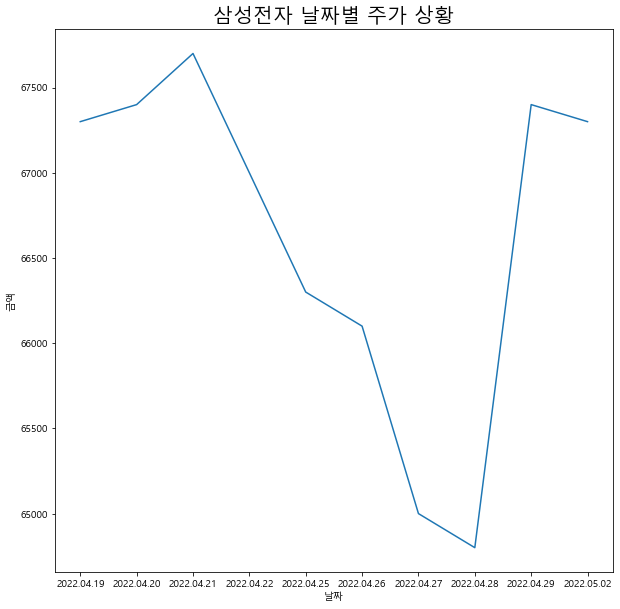

In [236]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
ax.plot(df['날짜'],df['종가'])
 
plt.xlabel('날짜')
plt.xticks(df['날짜'])
plt.ylabel('금액')
plt.title('삼성전자 날짜별 주가 상황',fontsize=20)
plt.show()